In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

In [3]:
Sham=pt.classify_phases('Kspars_Shamloo.xlsx', sheet_name='alkali feldspar_with_headings', return_end_members=True,
                        str_to_drop='_Kspar')
Sham

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe
0,64.3063,0.021011,18.2247,0.161222,0.006077,0.0,0.624609,5.28518,8.09002,0.0,0.0,96.719119,Fspar,Kspar,0.482515,0.031513,0.485973,Sanidine,N/A
1,66.0925,0.017386,18.3707,0.113386,0.000000,0.0,0.463835,5.20276,8.73465,0.0,0.0,98.995217,Fspar,Kspar,0.464271,0.022873,0.512855,Sanidine,N/A
2,65.9092,0.015583,18.4277,0.137234,0.000000,0.0,0.516232,5.16370,8.72313,0.0,0.0,98.892779,Fspar,Kspar,0.461514,0.025497,0.512989,Sanidine,N/A
3,66.1148,0.018833,18.5615,0.122854,0.020247,0.0,0.508770,5.23344,8.66407,0.0,0.0,99.244514,Fspar,Kspar,0.466631,0.025069,0.5083,Sanidine,N/A
4,66.4107,0.000000,18.6387,0.091056,0.000000,0.0,0.562197,5.26987,8.51813,0.0,0.0,99.490653,Fspar,Kspar,0.471143,0.027776,0.501081,Sanidine,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,61.6998,0.091662,18.3270,0.000000,0.000000,0.0,0.003693,1.77829,13.76100,0.0,0.0,95.661445,Fspar,Kspar,0.164128,0.000188,0.835684,Sanidine,N/A
692,63.7160,0.000000,18.6734,0.000000,0.000000,0.0,0.005477,1.75034,13.79230,0.0,0.0,97.937517,Fspar,Kspar,0.161643,0.00028,0.838077,Sanidine,N/A
693,63.2802,0.000000,18.7136,0.000000,0.000000,0.0,0.000000,1.76903,14.00350,0.0,0.0,97.766330,Fspar,Kspar,0.161069,0.0,0.838931,Sanidine,N/A
694,63.7372,0.031927,18.6757,0.000000,0.000000,0.0,0.000000,1.73697,13.85760,0.0,0.0,98.039397,Fspar,Kspar,0.160016,0.0,0.839984,Sanidine,N/A


## Loading machine learning model

In [2]:
# with open('svc_model_linear_MinClass.pkl', 'rb') as f:
#         svc_model=load(f)
# with open('scaler_MinClass.pkl', 'rb') as f:
#         scaler=load(f)

## Jordans Galan data

In [3]:
# def classify_phases(filename, sheet_name, return_end_members=False):
#     Excel_In=pt.import_excel(filename, sheet_name)
#     Oxides=Excel_In['my_oxides']
#     with open('svc_model_linear_MinClass.pkl', 'rb') as f:
#         svc_model=load(f)
#     with open('scaler_MinClass.pkl', 'rb') as f:
#         scaler=load(f)  
        
#     # Dropping things which are often missing
#     Oxides_dropoxides=Oxides.drop(columns=['Cr2O3', 'K2O', 'P2O5'])
#     X_in=Oxides_dropoxides.values
    
#     ## This does the machine learning classification
#     X_in_scaled= scaler.transform(X_in)
#     svc_predictions=svc_model.predict(X_in_scaled) 
#     Oxides_out=Oxides.copy()
#     Oxides_out['Sum_Oxides']=Oxides.sum(axis=1)
#     Oxides_out['Phase_Min_Group_ML']=svc_predictions
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(0, "Amp")    
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(1, "Px")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(2, "Fspar")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(3, "Ol")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(4, "Sp")
#     Oxides_out[['Phase_Min_Group_ML']]=Oxides_out[['Phase_Min_Group_ML']].replace(5, "Ox")

    
#     Oxides_out.loc[Oxides_out['Sum_Oxides']<90, 'Phase_Min_Group_ML'] = "Not Classified - Total<90"    
#     Oxides_out.loc[Oxides_out['Sum_Oxides']>110, 'Phase_Min_Group_ML'] = "Not Classified - Total>110"
#     Oxides_out['Phase_Mineral']=Oxides_out['Phase_Min_Group_ML']
    
#     #This does manual classification for feldsdpars.
#     Fspar=Oxides_out['Phase_Min_Group_ML']=="Fspar" # This checks we are only doing it for felspar
#     Oxides_Fspar=Oxides_out.add_suffix('_Plag')
#     Fspar_components=pt.calculate_cat_fractions_plagioclase(plag_comps=Oxides_Fspar)
#     Fspar_An=Fspar_components['An_Plag']
#     Fspar_Ab=Fspar_components['Ab_Plag']
#     Fspar_Or=Fspar_components['Or_Plag']  
#     if return_end_members==True:
#         Oxides_out['Ab']=Fspar_Ab
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'Ab']="N/A"
#         Oxides_out['An']=Fspar_An
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'An']="N/A"
#         Oxides_out['Or']=Fspar_Or
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'Or']="N/A"
        
#     Oxides_out.loc[( (Fspar) & (Fspar_An>0.1) & (Fspar_Or<0.1) ), 'Phase_Mineral'] = "Plag"    
#     Oxides_out.loc[( (Fspar) & (Fspar_Or>0.1) & (Fspar_An<0.1)), 'Phase_Mineral'] = "Kspar"    
#     Oxides_out.loc[(Fspar & (Fspar_An<0.1) &  (Fspar_Or<0.1)), 'Phase_Mineral'] = "Albite"      
    
#     Oxides_out['Fspar_Class']=Oxides_out['Phase_Min_Group_ML']

#     Oxides_out.loc[( (Fspar) & (Fspar_An<0.1) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Albite"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_Or.between(0.1, 0.37) ) &  (Fspar_An<0.2)), 'Fspar_Class'] = "Anorthoclase"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_Or>0.37) &  (Fspar_An<0.2) ), 'Fspar_Class'] = "Sanidine"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An.between(0.1, 0.3)) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Oligoclase"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An.between(0.3, 0.5)) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Andesine"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An.between(0.5, 0.7)) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Bytownite"                        
#     Oxides_out.loc[( (Fspar) & (Fspar_An>0.9) &  (Fspar_Or<0.1) ), 'Fspar_Class'] = "Anorthite"                        
#     Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Fspar", 'Fspar_Class']="N/A"
    
#     # This does Manual Classification for Pyroxenes
#     Oxides_Pyroxenes=Oxides_out.add_suffix('_Opx')
#     Px=Oxides_out['Phase_Min_Group_ML']=="Px"

#     Px_components=pt.calculate_orthopyroxene_components(opx_comps=Oxides_Pyroxenes)
#     Px_CaMgFe=Px_components['Ca_CaMgFe']
#     Oxides_out.loc[( (Px) & (Px_CaMgFe<0.05) ), 'Phase_Mineral'] = "Opx"     
#     Oxides_out.loc[( (Px) & (Px_CaMgFe.between(0.05, 0.2)) ), 'Phase_Mineral'] = "Pig"     
#     Oxides_out.loc[( (Px) & (Px_CaMgFe>0.2) ), 'Phase_Mineral'] = "Cpx" 
#     if return_end_members==True:
#         Oxides_out['Ca/CaMgFe Px']=Px_CaMgFe
#         Oxides_out.loc[Oxides_out['Phase_Min_Group_ML']!="Px", 'Ca/CaMgFe']="N/A"    

#     # This does manual classification for amphiboles, based on Leake (1997)
    
    
#     return Oxides_out

In [4]:
Galan=pt.classify_phases('Galan_plag_oxides.xlsx', sheet_name='oxides', return_end_members=True)
Galan

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,P2O5,Sum_Oxides,Phase_Min_Group_ML,Phase_Mineral,Ab,An,Or,Fspar_Class,Ca/CaMgFe Px,Ca/CaMgFe
0,54.222949,0.005338,29.043135,0.0,0.0,0.000000,11.338169,4.641997,0.274048,0.0,0.0,99.525636,Fspar,Plag,0.41865,0.565087,0.016262,Bytownite,1.000000,N/A
1,59.963641,0.002335,24.441535,0.0,0.0,0.000000,5.982782,7.207719,0.824191,0.0,0.0,98.422204,Fspar,Plag,0.651915,0.299035,0.049049,Oligoclase,1.000000,N/A
2,58.288756,0.008007,25.793447,0.0,0.0,0.002487,7.559945,6.370226,0.585679,0.0,0.0,98.608547,Fspar,Plag,0.582641,0.382112,0.035247,Andesine,0.999542,N/A
3,60.637746,0.011176,24.388819,0.0,0.0,0.000000,5.920378,7.319465,0.829852,0.0,0.0,99.107437,Fspar,Plag,0.657208,0.293764,0.049027,Oligoclase,1.000000,N/A
4,59.899248,0.002168,24.970396,0.0,0.0,0.003317,6.479214,7.045423,0.821902,0.0,0.0,99.221668,Fspar,Plag,0.630928,0.320643,0.048429,Andesine,0.999288,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,56.011434,0.008841,28.368219,0.0,0.0,0.000000,10.380706,5.206391,0.374873,0.0,0.0,100.350462,Fspar,Plag,0.465287,0.512669,0.022043,Bytownite,1.000000,N/A
64,55.733320,0.017181,28.509362,0.0,0.0,0.000000,10.483965,5.079817,0.329821,0.0,0.0,100.153465,Fspar,Plag,0.458034,0.522398,0.019568,Bytownite,1.000000,N/A
65,57.974915,0.007506,26.091037,0.0,0.0,0.003317,8.265415,6.035661,0.508343,0.0,0.0,98.886194,Fspar,Plag,0.551818,0.417601,0.03058,Andesine,0.999442,N/A
66,61.291313,0.002836,24.551502,0.0,0.0,0.000663,6.235615,7.065373,0.758299,0.0,0.0,99.905601,Fspar,Plag,0.641709,0.312974,0.045316,Andesine,0.999852,N/A


In [ ]:
Galan=classify_phases('CT_sanidine_supplementary_data.xlsx', sheet_name='EPMA analyses', return_end_members=True)
sum(Galan['Fspar_Class']!="Sanidine")


In [ ]:
## Importing Hannas data
Hannah=classify_phases('KSpars_Shamloo.xlsx', sheet_name='alkali feldspar', return_end_members=True)
sum(Hannah['Fspar_Class']!="Sanidine")

In [ ]:
Hannah.loc[Hannah['Fspar_Class']!="Sanidine"]

## Importing Jordans data

In [ ]:
classify_phases('Toba_master_spots.xlsx', sheet_name='plagioclase', return_end_members=True)

In [ ]:
Jordan_Plag_in=pt.import_excel('Toba_master_spots.xlsx', sheet_name='plagioclase')
Jordan_Plag_in

In [ ]:
Jordan_Plag_Ox_noclass=Jordan_Plag_Ox.drop(columns=['Cr2O3', 'K2O', 'P2O5'])

In [ ]:
Jordan_Plag_Ox_noclass

In [ ]:
X_Jordan_Plag=Jordan_Plag_Ox_noclass.values
X_Jordan_Plag_scaled= scaler.transform(X_Jordan_Plag)
svc_predictions_Jordan_Plag=svc_model.predict(X_Jordan_Plag_scaled)

In [ ]:
Jordan_Plag_Ox_noclass['Phase']=svc_predictions_Jordan_Plag

In [ ]:
Jordan_Plag_Ox_noclass[['Phase']]=Jordan_Plag_Ox_noclass[['Phase']].replace(2, "Fspar")

In [ ]:
Jordan_Plag_Ox_noclass[['Phase']]

In [ ]:
notPlag=Jordan_Plag_Ox_noclass['Phase']!=2

In [ ]:
Jordan_Plag_Ox_noclass.loc[notPlag]

In [ ]:
Oxides_out=classify_phases('Toba_master_spots.xlsx', sheet_name='inclusions')

In [ ]:
Oxides_Amphiboles=Oxides_out.add_suffix('_Amp')
amp_sites=pt.get_amp_sites_from_input(amp_comps=Oxides_Amphiboles)
amp_cations=pt.calculate_23oxygens_amphibole(amp_comps=Oxides_Amphiboles)
ferric_ferrous=pt.amp_components_ferric_ferrous(amp_sites, amp_cations)
plt.plot(ferric_ferrous['SiO2'], ferric_ferrous['MgO']/(ferric_ferrous['MgO']+ferric_ferrous['FeO']), '.k', label='AfterFe re-adjust')
plt.plot(amp_cations['SiO2_Amp_cat_23ox'], amp_cations['MgO_Amp_cat_23ox']
         /(amp_cations['MgO_Amp_cat_23ox']+ferric_ferrous['FeO']), '.r', label='Si, Mg, Fe 23ox, FeO from re-adjust')
plt.plot(amp_cations['SiO2_Amp_cat_23ox'], amp_cations['MgO_Amp_cat_23ox']/
         (amp_cations['MgO_Amp_cat_23ox']+amp_cations['FeOt_Amp_cat_23ox']), '.b', label='Si, Mg, FeOt, 23ox')
plt.legend()
plt.xlabel('Si')
plt.ylabel('Mg/Mg+Fe')

In [ ]:
amp_cations

In [ ]:
ferric_ferrous

In [ ]:
plt.plot(amp_sites['Si_T']

In [ ]:
Jordan_Class_inc=classify_phases('Toba_master_spots.xlsx', sheet_name='inclusions')
Jordan_Class_inc

In [ ]:
Oxides_out=Jordan_Class_inc
Px=Oxides_out['Phase_Min_Group_ML']=="Px"
Px

In [ ]:
Jordan_Class_Plag=classify_phases('Toba_master_spots.xlsx', sheet_name='plagioclase')
sum(Jordan_Class_Plag['Phase_Min_Group_ML'] !="Fspar")
# Empty row
Jordan_Class_Plag.to_clipboard(excel=True)

In [ ]:
Jordan_Class_inc=classify_phases('Toba_master_spots.xlsx', sheet_name='inclusions')
Jordan_Class_inc.to_clipboard(excel=True)

In [ ]:
df=Jordan_Class_inc
df.loc[df['Sum_Oxides']<90, 'Phase_Min_Group_ML'] = "Not Classified - Low Total"

In [ ]:
df

In [ ]:
Jordan_Class_Amp=classify_phases('Toba_master_spots.xlsx', sheet_name='amphibole')
sum(Jordan_Class_Amp['Phase_Min_Group_ML'] !="Amp")
# Empty row

In [ ]:
Jordan_Class_inc=classify_phases('Toba_master_spots.xlsx', sheet_name='inclusions')
Jordan_Class_inc.to_clipboard(excel=True)

In [ ]:
Jordan_Class_inc

## Importing data for Amp (Phase=0)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']
LEPR_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Amp_PreFilt).cation_sum_All
LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]
LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]
LEPR_Amp_nosuf['Phase']=0

## Importing data Cpx (phase=1)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cs.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cs.Ca_CaMgFe
LEPR_Cpx=LEPR_Cpx_PreFilt.loc[(LEPR_Cpx_Sums.between(a, b))]
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]
LEPR_Cpx_nosuf['Phase']=1


## Importing data Opx (Phase=1)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Opx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Opx")
    LEPR_px_input=LEPR_Opx_in['my_input']
    LEPR_Opx_PreFilt=LEPR_Opx_in['Opxs']

LEPR_Opx_cs=pt.calculate_orthopyroxene_components(opx_comps=LEPR_Opx_PreFilt)
LEPR_Opx_Sums=LEPR_Opx_cs.Cation_Sum_Opx
LEPR_CaCaMgFe=LEPR_Opx_cs.Ca_CaMgFe


LEPR_Opx=LEPR_Opx_PreFilt.loc[(LEPR_Opx_Sums.between(a, b)) ]


LEPR_Opx_nosuf=LEPR_Opx.copy()
LEPR_Opx_nosuf.columns = [col.replace('_Opx', '') for col in LEPR_Opx_nosuf.columns]

LEPR_Opx_nosuf['Phase']=1

## Importing data for Plag (Phase=2)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Plag_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Plag")
    LEPR_px_input=LEPR_Plag_in['my_input']
    LEPR_Plag_PreFilt=LEPR_Plag_in['Plags']


LEPR_Plag=LEPR_Plag_PreFilt


LEPR_Plag_nosuf=LEPR_Plag.copy()
LEPR_Plag_nosuf.columns = [col.replace('_Plag', '') for col in LEPR_Plag_nosuf.columns]


LEPR_Plag_nosuf['Phase']=2

## Importing data for olivine (Phase = 3)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Ol_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Ol")
    LEPR_px_input=LEPR_Ol_in['my_input']
    LEPR_Ol_PreFilt=LEPR_Ol_in['Ols']


LEPR_Ol=LEPR_Ol_PreFilt


LEPR_Ol_nosuf=LEPR_Ol.copy()
LEPR_Ol_nosuf.columns = [col.replace('_Ol', '') for col in LEPR_Ol_nosuf.columns]

LEPR_Ol_nosuf['Phase']=3

## Importing Spinel data (Phase = 4)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Sp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cr_Sp")
    LEPR_Sp_input=LEPR_Sp_in['my_input']
    LEPR_Sp_PreFilt=LEPR_Sp_in['Sps']

LEPR_Sp=LEPR_Sp_PreFilt
LEPR_Sp_nosuf=LEPR_Sp.copy()
LEPR_Sp_nosuf.columns = [col.replace('_Sp', '') for col in LEPR_Sp_nosuf.columns]
LEPR_Sp_nosuf['Phase']=4


## Importing Oxide, phase = 5

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Ox_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Oxide")
    LEPR_Ox_input=LEPR_Ox_in['my_input']
    LEPR_Ox_PreFilt=LEPR_Ox_in['Sps']


LEPR_Ox=LEPR_Ox_PreFilt

LEPR_Ox_nosuf=LEPR_Ox.copy()
LEPR_Ox_nosuf.columns = [col.replace('_Sp', '') for col in LEPR_Ox_nosuf.columns]
LEPR_Ox_nosuf['Phase']=5


## Alk Feldspar Phase = 2

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Kspar_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Kspar")
    LEPR_px_input=LEPR_Kspar_in['my_input']
    LEPR_Kspar_PreFilt=LEPR_Kspar_in['Kspars']


LEPR_Kspar=LEPR_Kspar_PreFilt


LEPR_Kspar_nosuf=LEPR_Kspar.copy()
LEPR_Kspar_nosuf.columns = [col.replace('_Kspar', '') for col in LEPR_Kspar_nosuf.columns]


LEPR_Kspar_nosuf['Phase']=2

## Stitching different phases together

In [ ]:
LEPR_Combo=pd.concat([LEPR_Cpx_nosuf, LEPR_Amp_nosuf, LEPR_Opx_nosuf,  LEPR_Plag_nosuf, 
                      LEPR_Ol_nosuf,  LEPR_Sp_nosuf, LEPR_Ox_nosuf, LEPR_Kspar_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
LEPR_Y=LEPR_Combo['Phase']
LEPR_Combo_noclass=LEPR_Combo.drop(columns=['Phase', 'Sample_ID', 'NiO', 'Cr2O3', 'K2O'])
LEPR_X=LEPR_Combo_noclass.values

## Importing new data from my compilation

In [ ]:
PW_Amp_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Amp")
PW_Amp_input=PW_Amp_in['my_input']
PW_Amp_PreFilt=PW_Amp_in['Amps']
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All
PW_Amp=PW_Amp_PreFilt.loc[PW_Amp_Sums.between(15.5, 16)]
PW_Amp_nosuf=PW_Amp.copy()
PW_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
PW_Amp_nosuf.columns = [col.replace('_Amp', '') for col in PW_Amp_nosuf.columns]
PW_Amp_nosuf['Phase']=0

In [ ]:
PW_Cpx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Cpx")
PW_Cpx_input=PW_Cpx_in['my_input']
PW_Cpx_PreFilt=PW_Cpx_in['Cpxs']
PW_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=PW_Cpx_PreFilt)
PW_Cpx_Sums=PW_Cpx_cs.Cation_Sum_Cpx
PW_CaCaMgFe=PW_Cpx_cs.Ca_CaMgFe


PW_Cpx=PW_Cpx_PreFilt.loc[(PW_Cpx_Sums.between(a, b)) & (PW_CaCaMgFe>0.2) ]


PW_Cpx_nosuf=PW_Cpx.copy()
PW_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in PW_Cpx_nosuf.columns]

PW_Cpx_nosuf['Phase']=1


In [ ]:
PW_Opx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Opx")
PW_Opx_input=PW_Opx_in['my_input']
PW_Opx_PreFilt=PW_Opx_in['Opxs']
PW_Opx_cs=pt.calculate_orthopyroxene_components(opx_comps=PW_Opx_PreFilt)
PW_Opx_Sums=PW_Opx_cs.Cation_Sum_Opx
PW_CaCaMgFe=PW_Opx_cs.Ca_CaMgFe


PW_Opx=PW_Opx_PreFilt.loc[(PW_Opx_Sums.between(a, b)) & (PW_CaCaMgFe<0.05) ]


PW_Opx_nosuf=PW_Opx.copy()
PW_Opx_nosuf.columns = [col.replace('_Opx', '') for col in PW_Opx_nosuf.columns]

PW_Opx_nosuf['Phase']=1


In [ ]:
plt.plot(PW_Opx_cs['Ca_CaMgFe'], PW_Opx_PreFilt['CaO_Opx'], 'ok')

In [ ]:
PW_Plag_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", 
                           sheet_name="Plag-Liq")
PW_Plag_input=PW_Plag_in['my_input']
PW_Plag_PreFilt=PW_Plag_in['Plags']


PW_Plag=PW_Plag_PreFilt


PW_Plag_nosuf=PW_Plag.copy()
PW_Plag_nosuf.columns = [col.replace('_Plag', '') for col in PW_Plag_nosuf.columns]

PW_Plag_nosuf['Phase']=2


In [ ]:
PW_Ol_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Ol-Liq")
PW_Ol_input=PW_Ol_in['my_input']
PW_Ol_PreFilt=PW_Ol_in['Ols']


PW_Ol=PW_Ol_PreFilt


PW_Ol_nosuf=PW_Ol.copy()
PW_Ol_nosuf.columns = [col.replace('_Ol', '') for col in PW_Ol_nosuf.columns]

PW_Ol_nosuf['Phase']=3


In [ ]:
PW_Combo=pd.concat([PW_Cpx_nosuf, PW_Amp_nosuf, PW_Opx_nosuf, PW_Plag_nosuf, PW_Ol_nosuf]  , axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
PW_Y=PW_Combo['Phase']
PW_Combo_noclass=PW_Combo.drop(columns=['Phase', 'Sample_ID', 'NiO', 'Cr2O3', 'K2O'])
PW_X=PW_Combo_noclass.values

## Importing LEPR data from Keith's barometry calibrations
- Amp compositions stored in LEPR_Amp
- Cpx compositions stored in Cpx_Amp, have already taken out those with Ca_CaMgFe<0.05 (e.g. Opxs that have snuck into LEPR)

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r', label='Cpx (+pig)')
ax0.plot(LEPR_Opx['SiO2_Opx'], LEPR_Opx['CaO_Opx'], '.k', alpha=0.1, label='opx')
ax0.set_xlabel('SiO2')
ax0.set_ylabel('CaO')
ax0.set_title('Experiments')

In [ ]:
## Viualizing differences
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
ax0.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.c', alpha=0.5)
ax0.plot(LEPR_Opx['SiO2_Opx'], LEPR_Opx['CaO_Opx'], '.k', alpha=0.1)
ax0.plot(LEPR_Plag['SiO2_Plag'], LEPR_Plag['CaO_Plag'], '.g', alpha=0.1)
ax0.plot(LEPR_Ol['SiO2_Ol'], LEPR_Ol['CaO_Ol'], '.m', alpha=0.1)
ax0.plot(LEPR_Sp['SiO2_Sp'], LEPR_Sp['CaO_Sp'], '*k', alpha=0.7, ms=3)
ax0.plot(LEPR_Ox['SiO2_Sp'], LEPR_Ox['CaO_Sp'], '*g', alpha=0.7, ms=3)
ax0.plot(LEPR_Kspar['SiO2_Kspar'], LEPR_Kspar['CaO_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)

ax1.plot(LEPR_Cpx['MgO_Cpx'], LEPR_Cpx['Al2O3_Cpx'], '.r')
ax1.plot(LEPR_Amp['MgO_Amp'], LEPR_Amp['Al2O3_Amp'], '.c', alpha=0.5)
ax1.plot(LEPR_Opx['MgO_Opx'], LEPR_Opx['Al2O3_Opx'], '.k', alpha=0.1)
ax1.plot(LEPR_Plag['MgO_Plag'], LEPR_Plag['Al2O3_Plag'], '.g', alpha=0.1)
ax1.plot(LEPR_Ol['MgO_Ol'], LEPR_Ol['Al2O3_Ol'], '.m', alpha=0.1)
ax1.plot(LEPR_Sp['MgO_Sp'], LEPR_Sp['Al2O3_Sp'], '*k', alpha=0.7, ms=3)
ax1.plot(LEPR_Ox['MgO_Sp'], LEPR_Ox['Al2O3_Sp'], '*g', alpha=0.7, ms=3)
ax1.plot(LEPR_Kspar['MgO_Kspar'], LEPR_Kspar['Al2O3_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)


ax2.plot(LEPR_Cpx['FeOt_Cpx'], LEPR_Cpx['Na2O_Cpx'], '.r')
ax2.plot(LEPR_Amp['FeOt_Amp'], LEPR_Amp['Na2O_Amp'], '.c', alpha=0.5)
ax2.plot(LEPR_Opx['FeOt_Opx'], LEPR_Opx['Na2O_Opx'], '.k', alpha=0.1)
ax2.plot(LEPR_Plag['FeOt_Plag'], LEPR_Plag['Na2O_Plag'], '.g', alpha=0.1)
ax2.plot(LEPR_Ol['FeOt_Ol'], LEPR_Ol['Na2O_Ol'], '.m', alpha=0.1)
ax2.plot(LEPR_Sp['FeOt_Sp'], LEPR_Sp['Na2O_Sp'], '*k', alpha=0.7, ms=3)
ax2.plot(LEPR_Ox['FeOt_Sp'], LEPR_Ox['Na2O_Sp'], '*g', alpha=0.7, ms=3)
ax2.plot(LEPR_Kspar['FeOt_Kspar'], LEPR_Kspar['Na2O_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)

ax3.plot(LEPR_Cpx['FeOt_Cpx'], LEPR_Cpx['TiO2_Cpx'], '.r')
ax3.plot(LEPR_Amp['FeOt_Amp'], LEPR_Amp['TiO2_Amp'], '.c', alpha=0.5)
ax3.plot(LEPR_Opx['FeOt_Opx'], LEPR_Opx['TiO2_Opx'], '.k', alpha=0.1)
ax3.plot(LEPR_Plag['FeOt_Plag'], LEPR_Plag['TiO2_Plag'], '.g', alpha=0.1)
ax3.plot(LEPR_Ol['FeOt_Ol'], LEPR_Ol['TiO2_Ol'], '.m', alpha=0.1)
ax3.plot(LEPR_Sp['FeOt_Sp'], LEPR_Sp['TiO2_Sp'], '*k', alpha=0.7, ms=3)
ax3.plot(LEPR_Ox['FeOt_Sp'], LEPR_Ox['TiO2_Sp'], '*g', alpha=0.7, ms=3)
ax3.plot(LEPR_Kspar['FeOt_Kspar'], LEPR_Kspar['TiO2_Kspar'], '.', mfc='darkgreen', alpha=0.7, ms=3)




In [ ]:
## Viualizing differences
fig, ((ax0, ax1), (ax2, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax0.plot(PW_Cpx['SiO2_Cpx'], PW_Cpx['CaO_Cpx'], '.r')
ax0.plot(PW_Amp['SiO2_Amp'], PW_Amp['CaO_Amp'], '.c', alpha=0.5)
ax0.plot(PW_Opx['SiO2_Opx'], PW_Opx['CaO_Opx'], '.k', alpha=0.1)
ax0.plot(PW_Plag['SiO2_Plag'], PW_Plag['CaO_Plag'], '.g', alpha=0.1)
ax0.plot(PW_Ol['SiO2_Ol'], PW_Ol['CaO_Ol'], '.m', alpha=0.1)

ax1.plot(PW_Cpx['MgO_Cpx'], PW_Cpx['Al2O3_Cpx'], '.r')
ax1.plot(PW_Amp['MgO_Amp'], PW_Amp['Al2O3_Amp'], '.c', alpha=0.5)
ax1.plot(PW_Opx['MgO_Opx'], PW_Opx['Al2O3_Opx'], '.k', alpha=0.1)
ax1.plot(PW_Plag['MgO_Plag'], PW_Plag['Al2O3_Plag'], '.g', alpha=0.1)
ax1.plot(PW_Ol['MgO_Ol'], PW_Ol['Al2O3_Ol'], '.m', alpha=0.1)

ax2.plot(PW_Cpx['FeOt_Cpx'], PW_Cpx['Na2O_Cpx'], '.r')
ax2.plot(PW_Amp['FeOt_Amp'], PW_Amp['Na2O_Amp'], '.c', alpha=0.5)
ax2.plot(PW_Opx['FeOt_Opx'], PW_Opx['Na2O_Opx'], '.k', alpha=0.1)
ax2.plot(PW_Plag['FeOt_Plag'], PW_Plag['Na2O_Plag'], '.g', alpha=0.1)
ax2.plot(PW_Ol['FeOt_Ol'], PW_Ol['Na2O_Ol'], '.m', alpha=0.1)

## Tutorial from https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# In my example, 0 is amphibole, 1 is cpx, 2 is Opx, 3 is Plag, 4 is Ol

In [ ]:
from sklearn.preprocessing import StandardScaler
X_test_noscaled=PW_X
y_test=PW_Y

X_train_noscaled=LEPR_X
y_train=LEPR_Y

scaler = StandardScaler().fit(X_train_noscaled)
X_train_scaled = scaler.transform(X_train_noscaled)
X_test_scaled=scaler.transform(X_test_noscaled)
# from sklearn.tree import DecisionTreeClassifier
# dtree_model = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)
# svc_predictions = dtree_model.predict(X_test)

# cm = confusion_matrix(y_test, svc_predictions)

from sklearn.svm import SVC
svc_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train)
svc_predictions = svc_model_linear.predict(X_test_scaled)
  
# model accuracy for X_test  
accuracy = svc_model_linear.score(X_test_scaled, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svc_predictions)

In [ ]:
accuracy

In [ ]:
len(PW_Cpx)

In [ ]:
# 'amp', cpx+opx+pig, plag+alk, ol, sp, ox, alk
cm

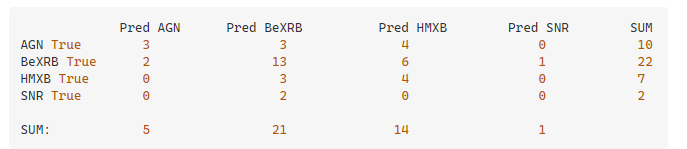

In [ ]:
pred_amp_svc=svc_predictions==0
pred_px_svc=svc_predictions==1
pred_fspar_svc=svc_predictions==2
pred_ol_svc=svc_predictions==3
pred_sp_svc=svc_predictions==4
pred_ox_svc=svc_predictions==5

plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc], PW_Combo['CaO'].loc[pred_amp_svc], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc], PW_Combo['CaO'].loc[pred_px_svc], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc], PW_Combo['CaO'].loc[pred_fspar_svc], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc], PW_Combo['CaO'].loc[pred_ol_svc], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc], PW_Combo['CaO'].loc[pred_sp_svc], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc], PW_Combo['CaO'].loc[pred_ox_svc],  '*g', alpha=0.7, ms=3)



## True Cpxs -Perfect classification!?

In [ ]:
## Currently none classified as Pigeonites
print('Number predicted Cpx')
sum(svc_predictions==1)

In [ ]:

Actual_Cpx=PW_Combo['Phase']==1
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Cpx], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Cpx], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Cpx], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Cpx], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Cpx],  '*g', alpha=0.7, ms=3)


## True Plags
- Things one is cpx, and 2 are opx. This is very feasible. 

In [ ]:
Actual_Plag=PW_Combo['Phase']==2
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Plag], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_px_svc&Actual_Plag], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Plag], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Plag], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Plag], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Plag],  '*g', alpha=0.7, ms=3)


In [ ]:
Actual_Amp=PW_Combo['Phase']==0
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Amp], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_px_svc&Actual_Amp], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Amp], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Amp], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Amp], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Amp],  '*g', alpha=0.7, ms=3)


In [ ]:
## CHeck dataset is wrong - Shift it off. 
PW_Combo.loc[pred_pig_svc&Actual_Plag]

##### These are from Peterman et al. And clearly not the phase they say they are...

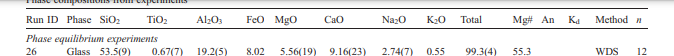

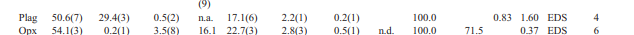

In [ ]:
PW_Combo.loc[pred_kspar_svc&Actual_Plag]

In [ ]:
## Why doesnt it classify as oxide

In [ ]:
MisClass_Pig=PW_Combo.loc[pred_pig_svc&Actual_Plag]
plt.plot(LEPR_Sp['MgO_Sp'], LEPR_Sp['CaO_Sp'], '*k', alpha=0.7, ms=3)
plt.plot(LEPR_Ox['MgO_Sp'], LEPR_Ox['CaO_Sp'], '*g', alpha=0.7, ms=3)
plt.plot(LEPR_Pig['MgO_Cpx'], LEPR_Pig['CaO_Cpx'], '*c', alpha=0.7, ms=3)
plt.plot(LEPR_Plag['MgO_Plag'], LEPR_Plag['CaO_Plag'], '*r', alpha=0.7, ms=3)

plt.plot(MisClass_Pig['MgO'], MisClass_Pig['CaO'], 'sk', mfc='c', alpha=0.7, ms=3)


In [ ]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.c')

plt.plot(PW_Combo['SiO2'].loc[pred_cpx_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_cpx_svc&Actual_Plag], '*c')


## True amphiboles

In [ ]:
pred_amp_svc=svc_predictions==0
pred_cpx_svc=svc_predictions==1
pred_opx_svc=svc_predictions==2
pred_plag_svc=svc_predictions==3
pred_ol_svc=svc_predictions==4

Actual_Amp=PW_Combo['Phase']==0
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Amp], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_cpx_svc&Actual_Amp], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_opx_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_opx_svc&Actual_Amp], '.k')
plt.plot(PW_Combo['SiO2'].loc[pred_plag_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_plag_svc&Actual_Amp], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Amp], '.m')

In [ ]:
## Writing this all as a function. 

## Saving the variables

In [ ]:
from pickle import dump
import pickle
dump(scaler, open('scaler_MinClass.pkl', 'wb'))
dump(svc_model_linear, open('svc_model_linear_MinClass.pkl', 'wb'))
